<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Machine learning : Testing Models </h1></center>

----------------------------

<center><h1>  Gradient Boost classification </h1></center>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
sys.path.append("../")
import utils

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

## Loading data

In [3]:
CI02 = utils.load_data("../data/for_learning/CI02.npy")
CI04 = utils.load_data("../data/for_learning/CI04.npy")
CI06 = utils.load_data("../data/for_learning/CI06.npy")
CI09 = utils.load_data("../data/for_learning/CI09.npy")
CI21 = utils.load_data("../data/for_learning/CI21.npy")

# Classification with learning on CI02

In [4]:
data = CI02

### Spliting dataset to train/test

In [5]:
X = data[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 

y = data['Y']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_set random 20%

### Apply Gradient Boost classifier

In [6]:
clf = GradientBoostingClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

### Evaluation of the prediction

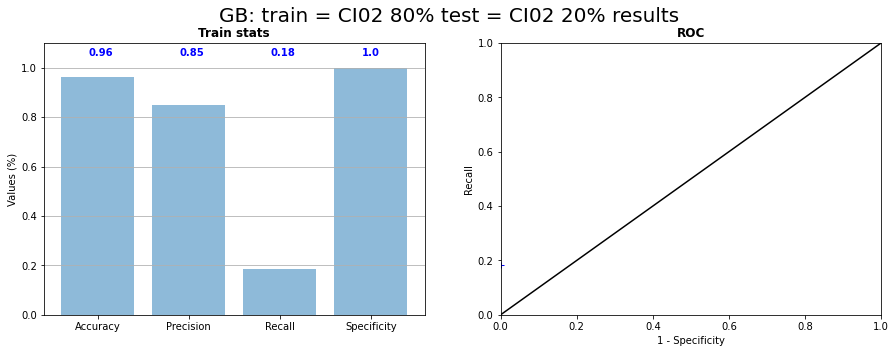

In [7]:
acc =metrics.accuracy_score(y_test, y_pred)
prec = metrics.precision_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="GB: train = CI02 80% test = CI02 20%")

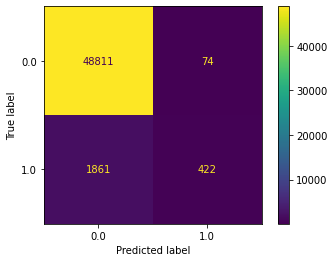

In [8]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) 
plt.show()

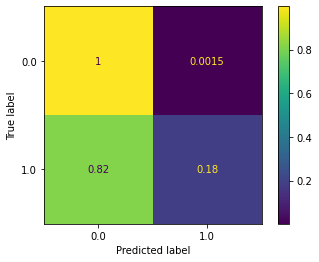

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,normalize="true")  
plt.show()

### Projection of test set

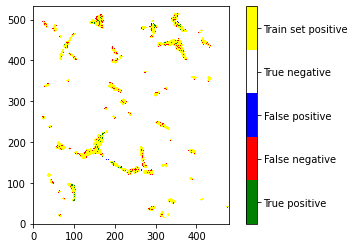

In [11]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_test,im_shape,y_train)

## Predict on CI02

In [10]:
X_val = CI02[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI02['Y'] 

In [12]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

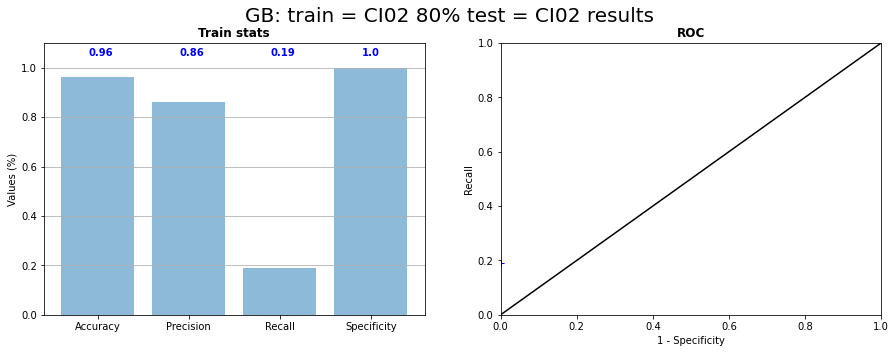

In [14]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="GB: train = CI02 80% test = CI02")

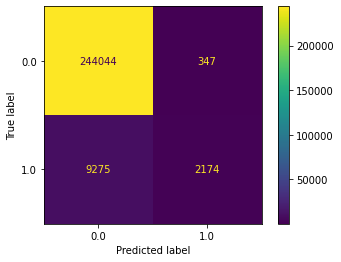

In [15]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred) 
plt.show()

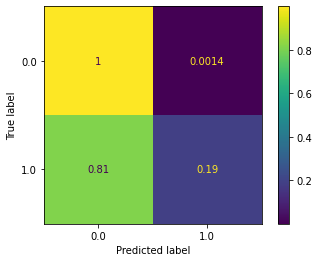

In [16]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of train/test set

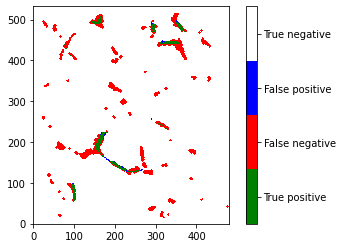

In [17]:
im_shape = np.shape(np.load("../data/for_learning/CI02.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)

## Predict on all CI06

In [19]:
X_val = CI06[['dist2GB', 'dist2TJ', 'schmid', 'diff_schmid','misangle','eqStrain','eqStress','act_pr','act_py','work']] 
y_val = CI06['Y'] 

In [20]:
y_pred = clf.predict(X_val)

### Evaluation of the prediction

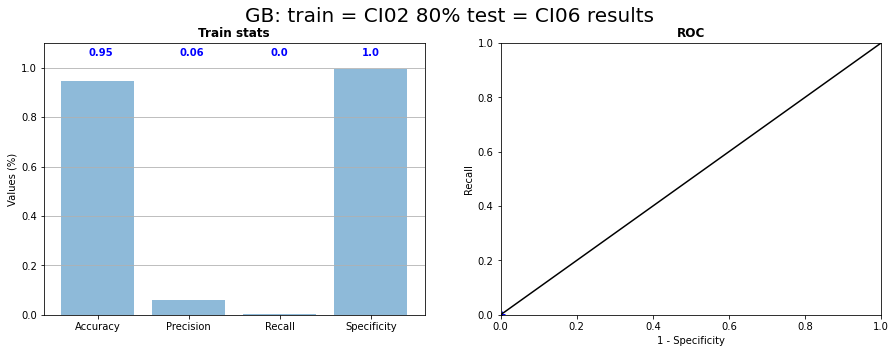

In [21]:
acc =metrics.accuracy_score(y_val, y_pred)
prec = metrics.precision_score(y_val, y_pred)
rec = metrics.recall_score(y_val, y_pred)
cm = metrics.confusion_matrix(y_val, y_pred)
spec = cm[0,0] / (cm[0,0] + cm[0,1])
utils.plot_lstats(acc,prec,rec,spec,model="GB: train = CI02 80% test = CI06")

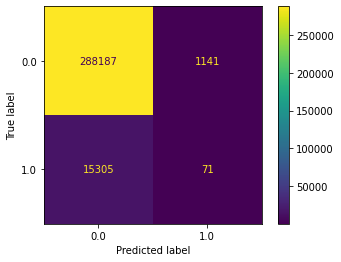

In [22]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred) 
plt.show()

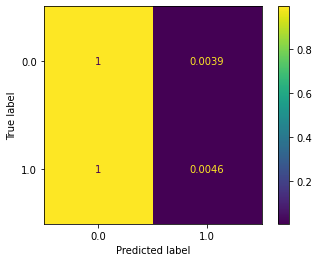

In [23]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred,normalize="true")  
plt.show()

### Projection of validation set

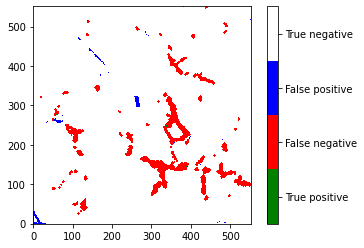

In [24]:
im_shape = np.shape(np.load("../data/for_learning/CI06.npy"))
utils.plot_pred_proj(y_pred,y_val,im_shape)